In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import h5py
import numpy as np
import scipy as sp
import scipy.stats as stats
import nibabel as nibabel
import pandas as pd
import nibabel.freesurfer.mghformat as mgh
import scipy.io
import itertools 
import pickle

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette
from scipy.spatial.distance import squareform

import sys
utils_dir = '/oak/stanford/groups/kalanit/biac2/kgs/projects/Dawn/NSD/code/streams/utils/'
sys.path.append(utils_dir)

from rsm_utils import get_flat_lower_tri, make_flat_rsms

In [3]:
data_dir = '../../../data/'
local_data_dir = '../../../local_data/'

subjid = ['05']
n_repeats = 3

#threshold for voxels (based on split-half reliability)
thresh = 0.0 #0.1 #0.2

In [12]:
with open(local_data_dir + 'processed/05_rh_tessellate_500_compbyrow.data', 'rb') as filehandle:
    # read the data as binary data stream
    full_mega_matrix = pickle.load(filehandle)[0]

In [13]:
with open(local_data_dir + 'processed/05_rh_tessellate_500_sharedimgs_compbyrow.data', 'rb') as filehandle:
    # read the data as binary data stream
    subset_mega_matrix = pickle.load(filehandle)[0]

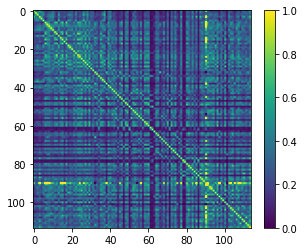

In [14]:
plt.imshow(full_mega_matrix)
plt.clim(0,1)
plt.colorbar(fraction=0.046, pad=0.04)

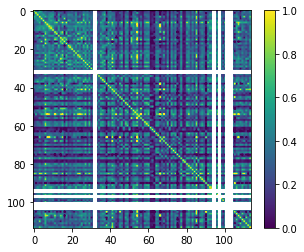

In [15]:
plt.imshow(subset_mega_matrix)
plt.clim(0,1)
plt.colorbar(fraction=0.046, pad=0.04)

In [16]:
#fix above 1s and nans
subset_mega_matrix[subset_mega_matrix>1] = 1
subset_mega_matrix[np.isnan(subset_mega_matrix)] = 0
subset_mega_matrix[np.diag_indices(len(subset_mega_matrix))] = 1 #fix diagonal

full_mega_matrix[full_mega_matrix>1] = 1
full_mega_matrix[np.isnan(full_mega_matrix)] = 0
full_mega_matrix[np.diag_indices(len(full_mega_matrix))] = 1 #fix diagonal

/oak/stanford/groups/kalanit/biac2/kgs/projects/Dawn/NSD_venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [17]:
subset_flat = get_flat_lower_tri(subset_mega_matrix)
full_flat = get_flat_lower_tri(full_mega_matrix)

In [18]:
stats.pearsonr(full_flat,subset_flat)

(0.6818299304930412, 0.0)